# A Basic exploration on NLP

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('C:\\Users\\Acer\\Downloads\\IMDB Dataset.csv')
df=df[:100] #Top 100 for testing

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
95,Daniel Day-Lewis is the most versatile actor a...,positive
96,My guess would be this was originally going to...,negative
97,"Well, I like to watch bad horror B-Movies, cau...",negative
98,"This IS the worst movie I have ever seen, as w...",negative


In [4]:
df['sentiment'].value_counts()

sentiment
negative    58
positive    42
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

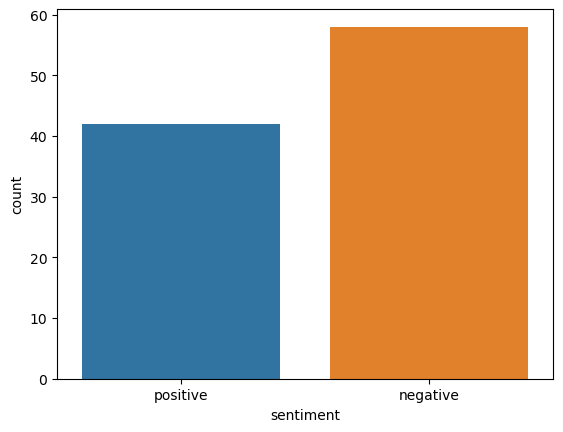

In [5]:
sns.countplot(x='sentiment',data=df)

In [6]:
positive_review=list(df[df['sentiment']=='positive']['review'])
negative_review=list(df[df['sentiment']=='negative']['review'])

In [8]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 871.5 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/300.2 kB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
from wordcloud import WordCloud,STOPWORDS

In [8]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

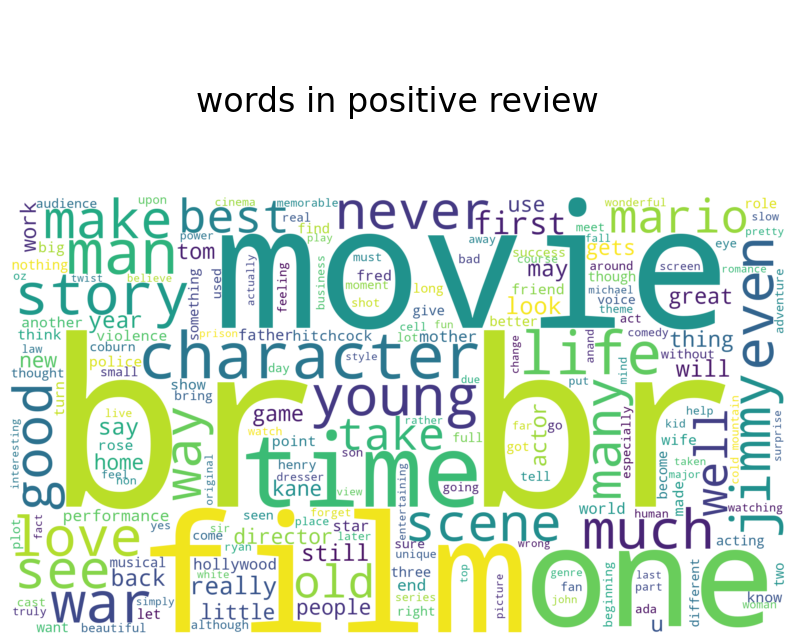

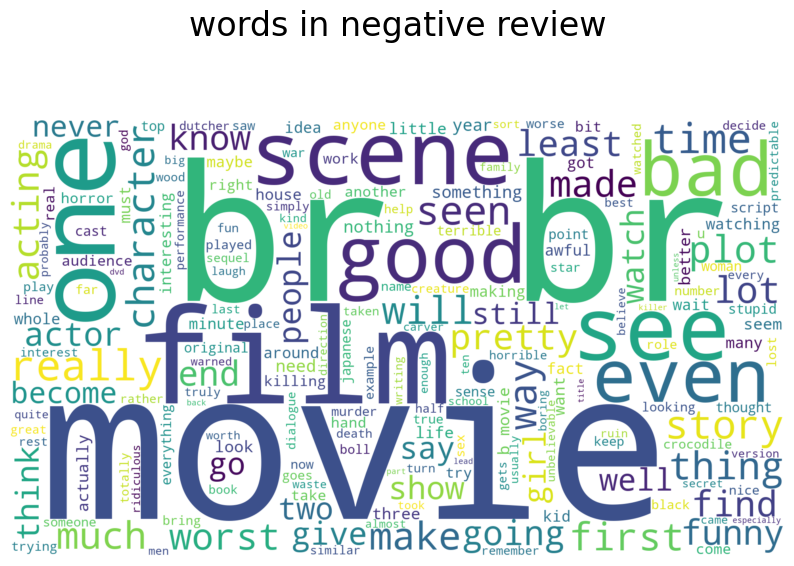

In [9]:
create_cloud(' '.join(positive_review).lower(),'\n\nwords in positive review\n\n')
print("\n\n")
create_cloud(' '.join(negative_review).lower(),'words in negative review\n\n')

In [10]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase  #decfontracting the words
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in data['review'].values:
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        # https://gist.github.com/sebleier/554280
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words))

      list2.append(' '.join(list1))
    return(list2)

In [11]:
#an example of stemming
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem("tasty")
porter.stem("confidential")
porter.stem("eating")
porter.stem("ignorance")

'ignor'

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
#an example of lematization

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
 
# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos="a"))

rocks : rock
corpora : corpus
better : good


In [13]:
x=text_processing(df)
df['cleaned_review']=x
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod will hooked...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl production. the film techniqu u...
2,I thought this was a wonderful way to spend ti...,positive,i thought wonder way spend time hot summer wee...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy (jake) think zombi clos...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [14]:
df_x=df['review']
df_y=df['sentiment']

In [15]:
df_x.shape

(100,)

In [16]:
df_y.shape

(100,)